In [71]:
#data handling, model creation/evaluation
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression, ElasticNet
from sklearn import metrics
import scipy.stats as stats
import pingouin as pg
from scipy.stats import f_oneway
from fastcluster import linkage, pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, fcluster, cophenet, set_link_color_palette

# visualisation
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt




In [72]:
# read data into a DataFrame
cryo_data = pd.read_csv("../data/CPP_antifreeze_glycoprotein_1.csv")
print(cryo_data.dtypes)
print(cryo_data.head())
print(cryo_data.shape)

AFGP_mM                            object
Recovery (%)                      float64
Forward Scatter (PLT size)          int64
Side Scatter (PLT granularity)      int64
pH (20-24C)                       float64
PLTs (x 109/L)                    float64
Glucose (mmol/L)                  float64
Lactate (mmol/L)                  float64
CD62P (% positive)                  int64
PAC-1(%)                            int64
GPVI(%)                             int64
CD41a(%)                            int64
Microparticles(x108/L)              int64
R_time                            float64
MA(mm)                              int64
PCT (secs)                          int64
dtype: object
     AFGP_mM  Recovery (%)  Forward Scatter (PLT size)  \
0  Trima_aph          99.9                        6000   
1  Trima_aph          99.8                        6234   
2  Trima_aph          99.9                        7000   
3  Trima_aph          99.7                        6989   
4  Trima_aph          99

In [73]:
cryo_data

,AFGP_mM,Recovery (%),Forward Scatter (PLT size),Side Scatter (PLT granularity),pH (20-24C),PLTs (x 109/L),Glucose (mmol/L),Lactate (mmol/L),CD62P (% positive),PAC-1(%),GPVI(%),CD41a(%),Microparticles(x108/L),R_time,MA(mm),PCT (secs)
0,Trima_aph,99.90,6000,3250,7.0,820.00,19.89,5.71,3,6,99,99,20,12.00,70,93
1,Trima_aph,99.80,6234,3990,7.1,819.60,21.30,6.28,4,10,97,99,21,11.00,71,102
2,Trima_aph,99.90,7000,3980,7.2,873.90,21.60,6.23,3,6,98,98,23,12.00,72,94
3,Trima_aph,99.70,6989,3767,7.1,872.70,20.60,6.22,5,9,99,99,22,12.00,70,95
4,Trima_aph,99.70,6500,3878,7.2,870.30,19.80,5.54,4,7,98,99,23,11.00,72,103
5,Trima_aph,99.60,6560,3876,7.1,780.90,18.90,5.89,3,8,97,98,21,10.00,71,101
6,Trima_aph,99.90,6689,3789,7.0,823.00,19.99,5.97,4,9,96,99,22,11.00,72,102
7,Trima_aph,99.80,6999,3908,7.1,834.00,19.80,5.51,7,5,99,99,23,12.00,73,103
8,DMSO,69.66,3901,2800,7.3,704.38,19.05,5.61,23,12,36,90,600,6.00,62,21
9,DMSO,70.90,3904,2700,7.6,779.02,21.88,6.68,29,15,40,89,650,6.00,63,22


In [74]:
cryo_data.describe()

,Recovery (%),Forward Scatter (PLT size),Side Scatter (PLT granularity),pH (20-24C),PLTs (x 109/L),Glucose (mmol/L),Lactate (mmol/L),CD62P (% positive),PAC-1(%),GPVI(%),CD41a(%),Microparticles(x108/L),R_time,MA(mm),PCT (secs)
count,41.000000,41.000000,41.000000,41.000000,41.00000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.00000,41.000000,41.000000,41.000000
mean,77.761951,5011.463415,3114.902439,7.324390,620.09878,18.338293,6.786829,13.243902,7.146341,62.731707,93.073171,616.97561,7.574390,59.317073,41.219512
std,14.548906,1096.605355,420.966733,0.179973,147.54320,2.199125,1.610965,7.244931,4.210469,24.106041,3.524133,313.01801,1.937058,7.040735,29.106281
min,45.700000,3901.000000,2500.000000,7.000000,412.96000,14.460000,4.530000,3.000000,1.000000,4.000000,87.000000,20.00000,6.000000,51.000000,20.000000
25%,65.400000,4056.000000,2800.000000,7.200000,502.34000,16.110000,5.610000,7.000000,4.000000,45.000000,90.000000,609.00000,6.600000,54.000000,27.000000
50%,78.900000,4440.000000,2989.000000,7.300000,598.76000,18.900000,6.680000,13.000000,7.000000,62.000000,92.000000,720.00000,6.800000,57.000000,28.000000
75%,86.080000,6000.000000,3323.000000,7.500000,770.82000,19.890000,7.340000,17.000000,9.000000,79.000000,95.000000,789.00000,6.940000,63.000000,32.000000
max,99.900000,7000.000000,3990.000000,7.600000,873.90000,21.880000,9.970000,29.000000,16.000000,99.000000,99.000000,999.00000,12.000000,73.000000,103.000000


In [75]:

cryo_data.groupby(["AFGP_mM"]).mean()

,Recovery (%),Forward Scatter (PLT size),Side Scatter (PLT granularity),pH (20-24C),PLTs (x 109/L),Glucose (mmol/L),Lactate (mmol/L),CD62P (% positive),PAC-1(%),GPVI(%),CD41a(%),Microparticles(x108/L),R_time,MA(mm),PCT (secs)
AFGP_mM,,,,,,,,,,,,,,,
AFGP_100mM,59.054444,4094.666667,2891.444444,7.444444,601.117778,17.456667,5.851111,16.555556,7.444444,40.777778,90.777778,760.111111,6.633333,57.111111,27.444444
AFGP_300mM,78.447500,4471.750000,3278.250000,7.337500,495.117500,18.226250,8.267500,12.750000,4.750000,62.000000,92.375000,833.875000,6.837500,54.125000,28.375000
AFGP_500mM,84.756250,5974.500000,2917.875000,7.400000,459.487500,16.956250,8.382500,8.000000,1.875000,78.875000,94.875000,814.125000,6.918750,51.875000,31.375000
DMSO,69.102500,4009.625000,2710.125000,7.325000,710.343750,18.927500,5.631250,24.375000,14.125000,36.875000,88.875000,637.000000,6.225000,62.375000,21.500000
Trima_aph,99.787500,6621.375000,3804.750000,7.100000,836.800000,20.235000,5.918750,4.125000,7.500000,97.875000,98.750000,21.875000,11.375000,71.375000,99.125000


In [76]:
cryo_data.groupby(["AFGP_mM"]).std()

,Recovery (%),Forward Scatter (PLT size),Side Scatter (PLT granularity),pH (20-24C),PLTs (x 109/L),Glucose (mmol/L),Lactate (mmol/L),CD62P (% positive),PAC-1(%),GPVI(%),CD41a(%),Microparticles(x108/L),R_time,MA(mm),PCT (secs)
AFGP_mM,,,,,,,,,,,,,,,
AFGP_100mM,5.290090,125.690095,178.612087,0.113039,60.946326,1.702410,1.335107,1.130388,0.881917,13.836345,0.666667,69.196178,0.100000,1.269296,0.726483
AFGP_300mM,2.562765,126.573242,184.216294,0.130247,50.267749,2.299565,1.123448,0.707107,1.035098,1.309307,0.744024,115.461110,0.074402,1.246423,0.744024
AFGP_500mM,1.824296,328.460913,74.307157,0.119523,48.191357,2.066114,1.352191,1.069045,0.640870,0.991031,0.640870,103.221589,0.055918,0.991031,0.744024
DMSO,4.595659,83.838173,100.180462,0.225198,58.565299,2.505957,0.822773,3.543102,1.246423,2.031010,1.125992,26.549146,0.166905,0.744024,0.925820
Trima_aph,0.112599,374.231379,237.713363,0.075593,33.141773,0.884017,0.310688,1.356203,1.772811,1.125992,0.462910,1.125992,0.744024,1.060660,4.323937


<AxesSubplot:xlabel='Side Scatter (PLT granularity)', ylabel='Forward Scatter (PLT size)'>

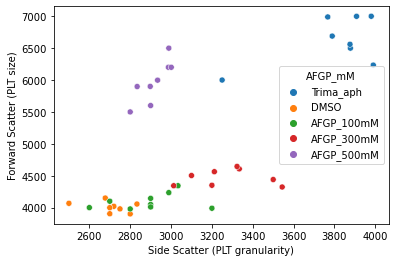

In [77]:
sns.scatterplot(data=cryo_data, x="Side Scatter (PLT granularity)", y="Forward Scatter (PLT size)", 
                        hue = "AFGP_mM")



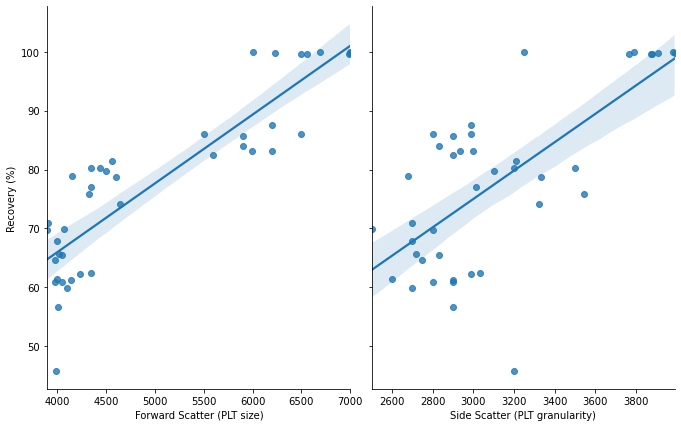

In [78]:
sns.pairplot(cryo_data, x_vars=["Forward Scatter (PLT size)","Side Scatter (PLT granularity)"], y_vars="Recovery (%)", height=6, aspect=0.8, kind='reg')

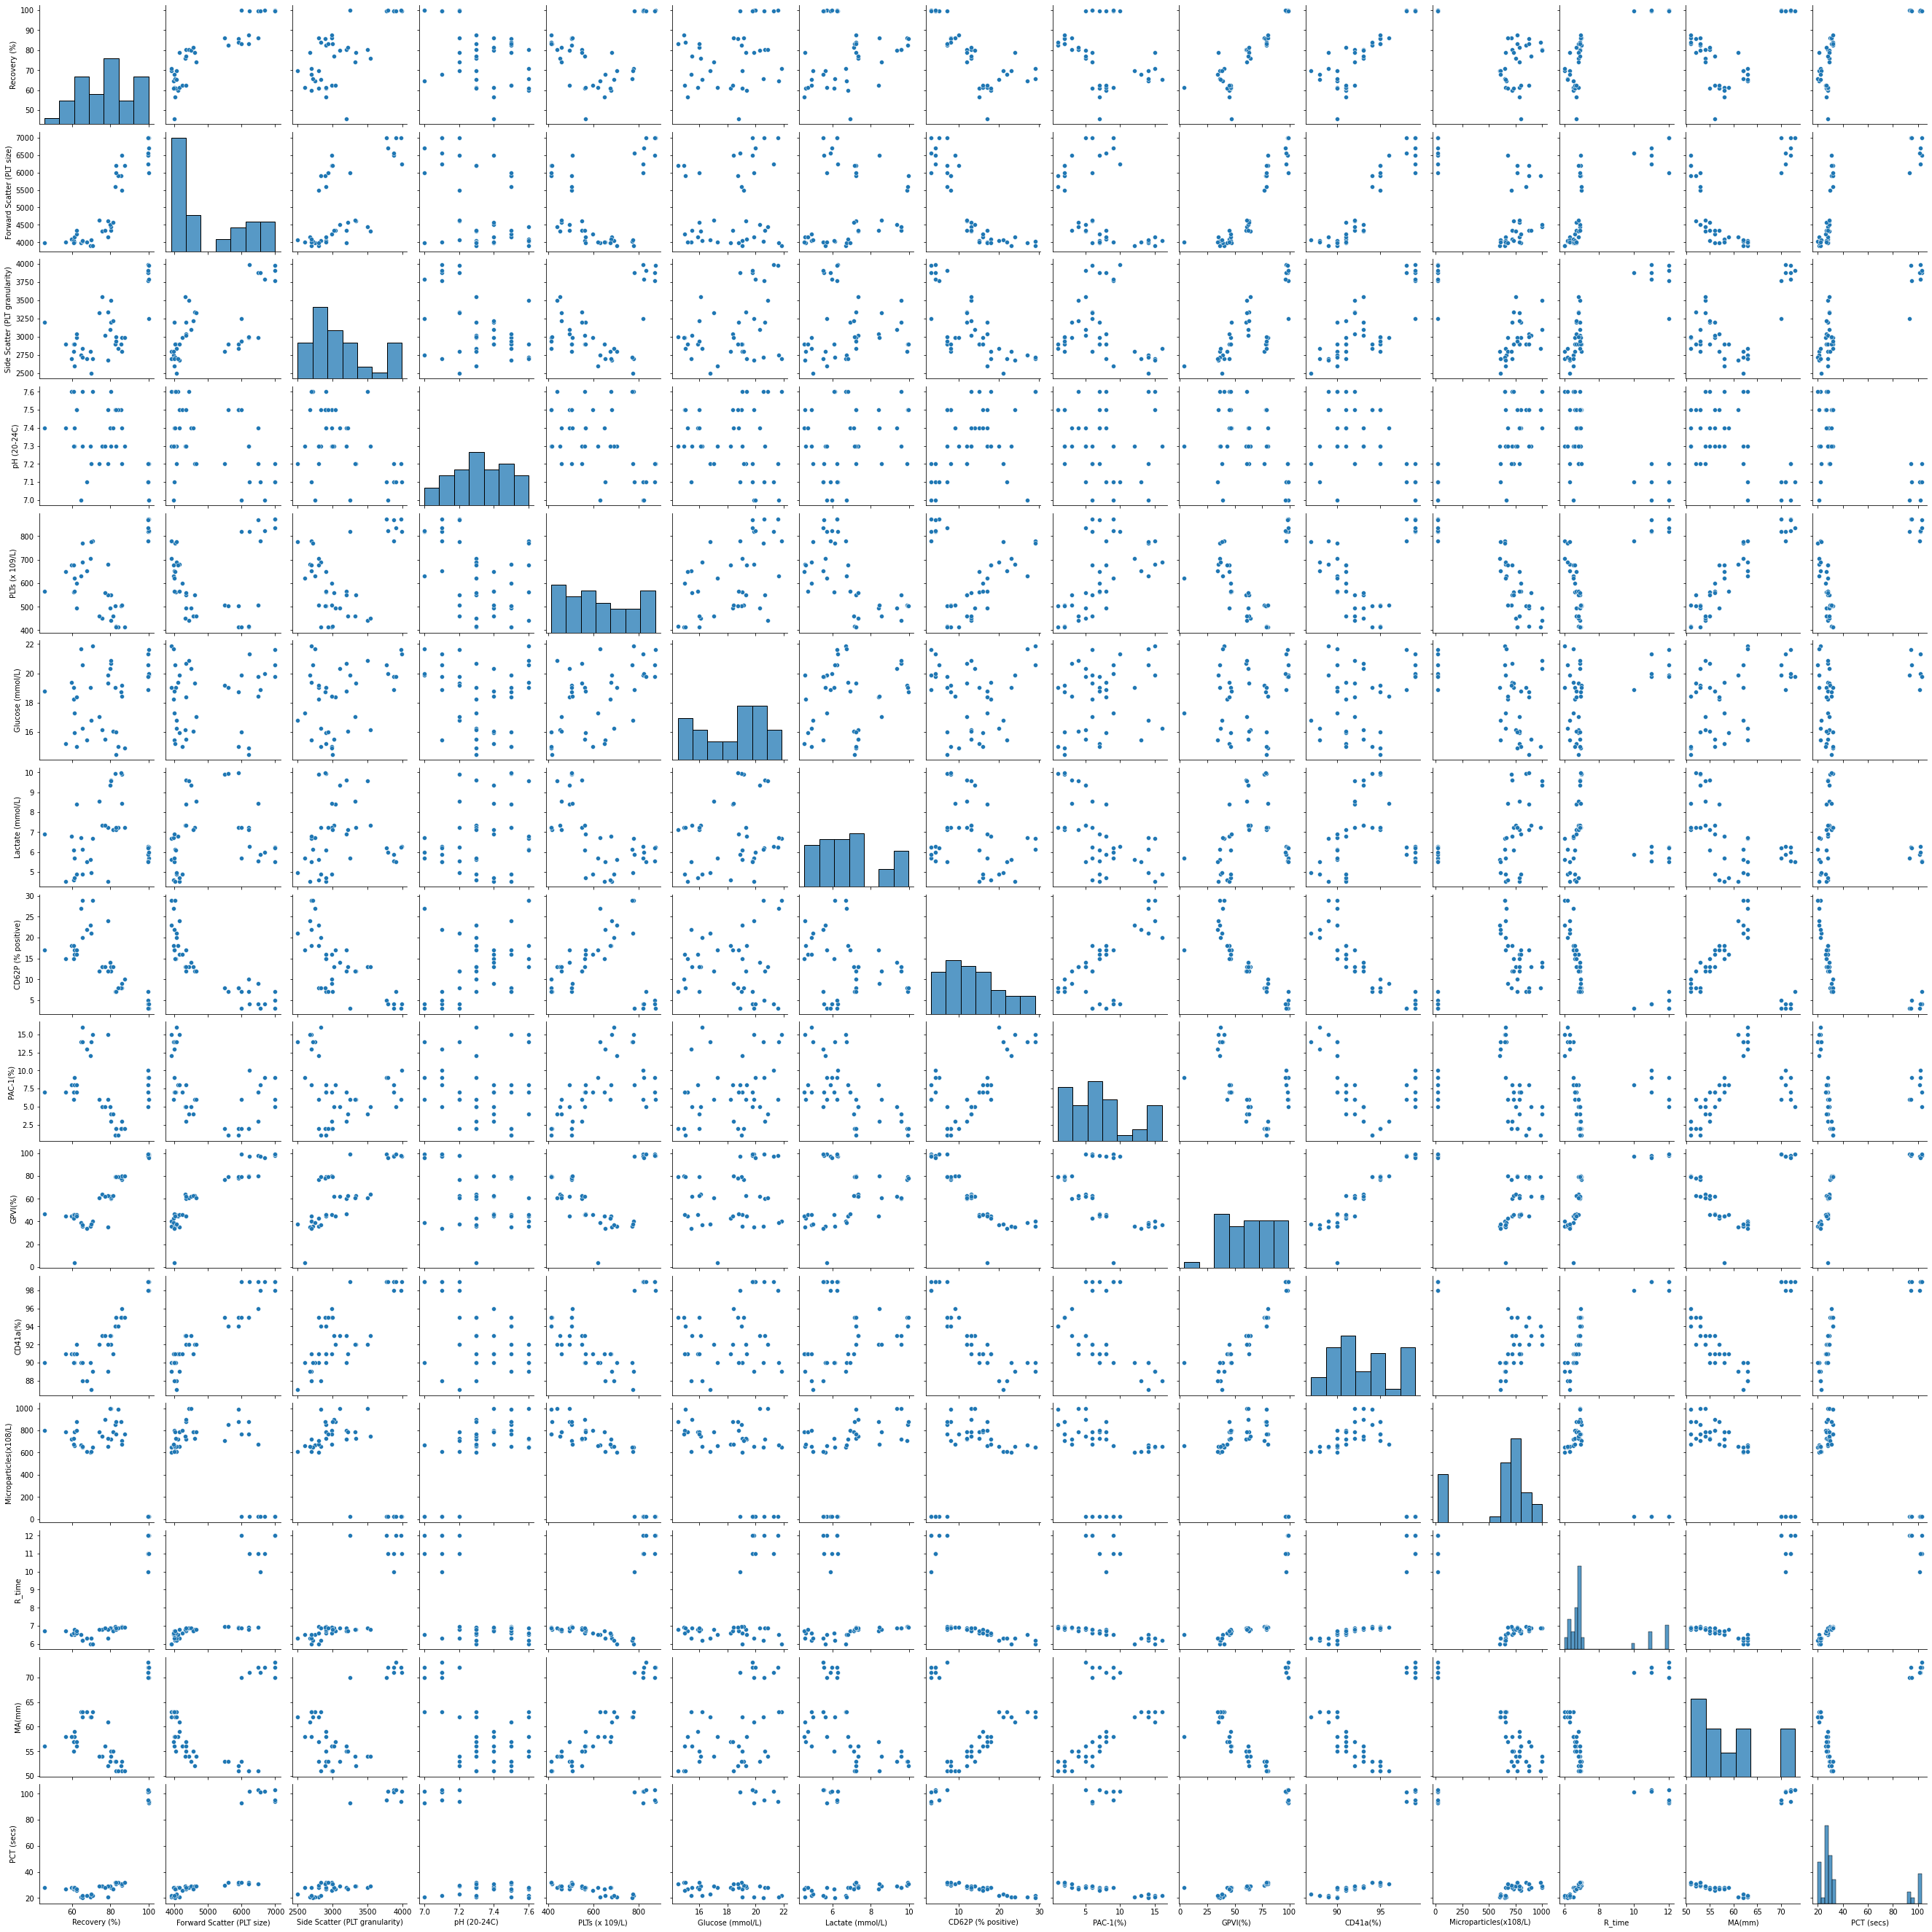

In [79]:
sns.pairplot(cryo_data)

In [80]:
cryo_auto_correlations = cryo_data.corr()
print(cryo_auto_correlations)

                                Recovery (%)  Forward Scatter (PLT size)  \
Recovery (%)                        1.000000                    0.882083   
Forward Scatter (PLT size)          0.882083                    1.000000   
Side Scatter (PLT granularity)      0.697772                    0.664795   
pH (20-24C)                        -0.488283                   -0.411707   
PLTs (x 109/L)                      0.301837                    0.229000   
Glucose (mmol/L)                    0.298039                    0.150115   
Lactate (mmol/L)                    0.176906                    0.142720   
CD62P (% positive)                 -0.764922                   -0.850662   
PAC-1(%)                           -0.316145                   -0.448932   
GPVI(%)                             0.886709                    0.921470   
CD41a(%)                            0.869634                    0.925136   
Microparticles(x108/L)             -0.652163                   -0.613794   
R_time      

<AxesSubplot:>

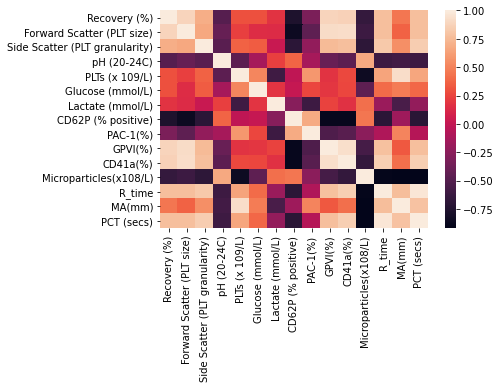

In [81]:
sns.heatmap(cryo_auto_correlations)

In [82]:
cryo_data.dtypes

AFGP_mM                            object
Recovery (%)                      float64
Forward Scatter (PLT size)          int64
Side Scatter (PLT granularity)      int64
pH (20-24C)                       float64
PLTs (x 109/L)                    float64
Glucose (mmol/L)                  float64
Lactate (mmol/L)                  float64
CD62P (% positive)                  int64
PAC-1(%)                            int64
GPVI(%)                             int64
CD41a(%)                            int64
Microparticles(x108/L)              int64
R_time                            float64
MA(mm)                              int64
PCT (secs)                          int64
dtype: object

In [83]:
# We will need to drop the AFGP_mM column so we can do classification modelling!
cryo_data = cryo.drop("AFGP_mM", axis=1)

In [84]:
cryo_data.head()

,Recovery (%),Forward Scatter (PLT size),Side Scatter (PLT granularity),pH (20-24C),PLTs (x 109/L),Glucose (mmol/L),Lactate (mmol/L),CD62P (% positive),PAC-1(%),GPVI(%),CD41a(%),Microparticles(x108/L),R_time,MA(mm),PCT (secs)
0,99.9,6000,3250,7.0,820.0,19.89,5.71,3,6,99,99,20,12.0,70,93
1,99.8,6234,3990,7.1,819.6,21.30,6.28,4,10,97,99,21,11.0,71,102
2,99.9,7000,3980,7.2,873.9,21.60,6.23,3,6,98,98,23,12.0,72,94
3,99.7,6989,3767,7.1,872.7,20.60,6.22,5,9,99,99,22,12.0,70,95
4,99.7,6500,3878,7.2,870.3,19.80,5.54,4,7,98,99,23,11.0,72,103


In [85]:
# Create our X and y
# X stands for complete dataset
# y stands for variable to be modelled.
X = cryo_data[cryo_data.columns]
y = cryo_data["Forward Scatter (PLT size)"]

print(f"X: {X.shape}, y: {y.shape}")

X: (41, 15), y: (41,)


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [87]:
# Instantiate!
cryo_datalr = LogisticRegression()

# Fit!
cryo_datalr.fit(X_train, y_train)

# Predict!
predictions_cryo_datalr = cryo_datalr.predict(X_test)

# Score!
accuracy_cryo_datalr = metrics.accuracy_score(y_test, predictions_cryo_datalr)
print(f"The accuracy of the Logistic Regression model was {accuracy_cryo_datalr}")

The accuracy of the Logistic Regression model was 0.0


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
# Lasso Regression (L1 regularization for Logistic Regression) 

In [89]:
# Instantiate!
rf = RandomForestClassifier()

# Fit!
rf.fit(X_train, y_train)

# Predict!
predictions_rf = rf.predict(X_test)

# Score!
accuracy_rf = metrics.accuracy_score(y_test, predictions_rf)
print(f"The accuracy of the RF model was {accuracy_rf}")

The accuracy of the RF model was 0.1111111111111111


In [90]:
# Instantiate!
knn = KNeighborsClassifier()

# Fit!
knn.fit(X_train, y_train)

# Predict!
predictions_knn = knn.predict(X_test)

# Score!
accuracy_knn = metrics.accuracy_score(y_test, predictions_knn)
print(f"The accuracy of the KNN model was {accuracy_knn}")

The accuracy of the KNN model was 0.0


In [91]:
sc = StandardScaler()
cryo_data_scaled  = cryo_data.copy()
cryo_data_scaled[cryo_data.columns]= sc.fit_transform(cryo_data[cryo_data.columns].astype(float))

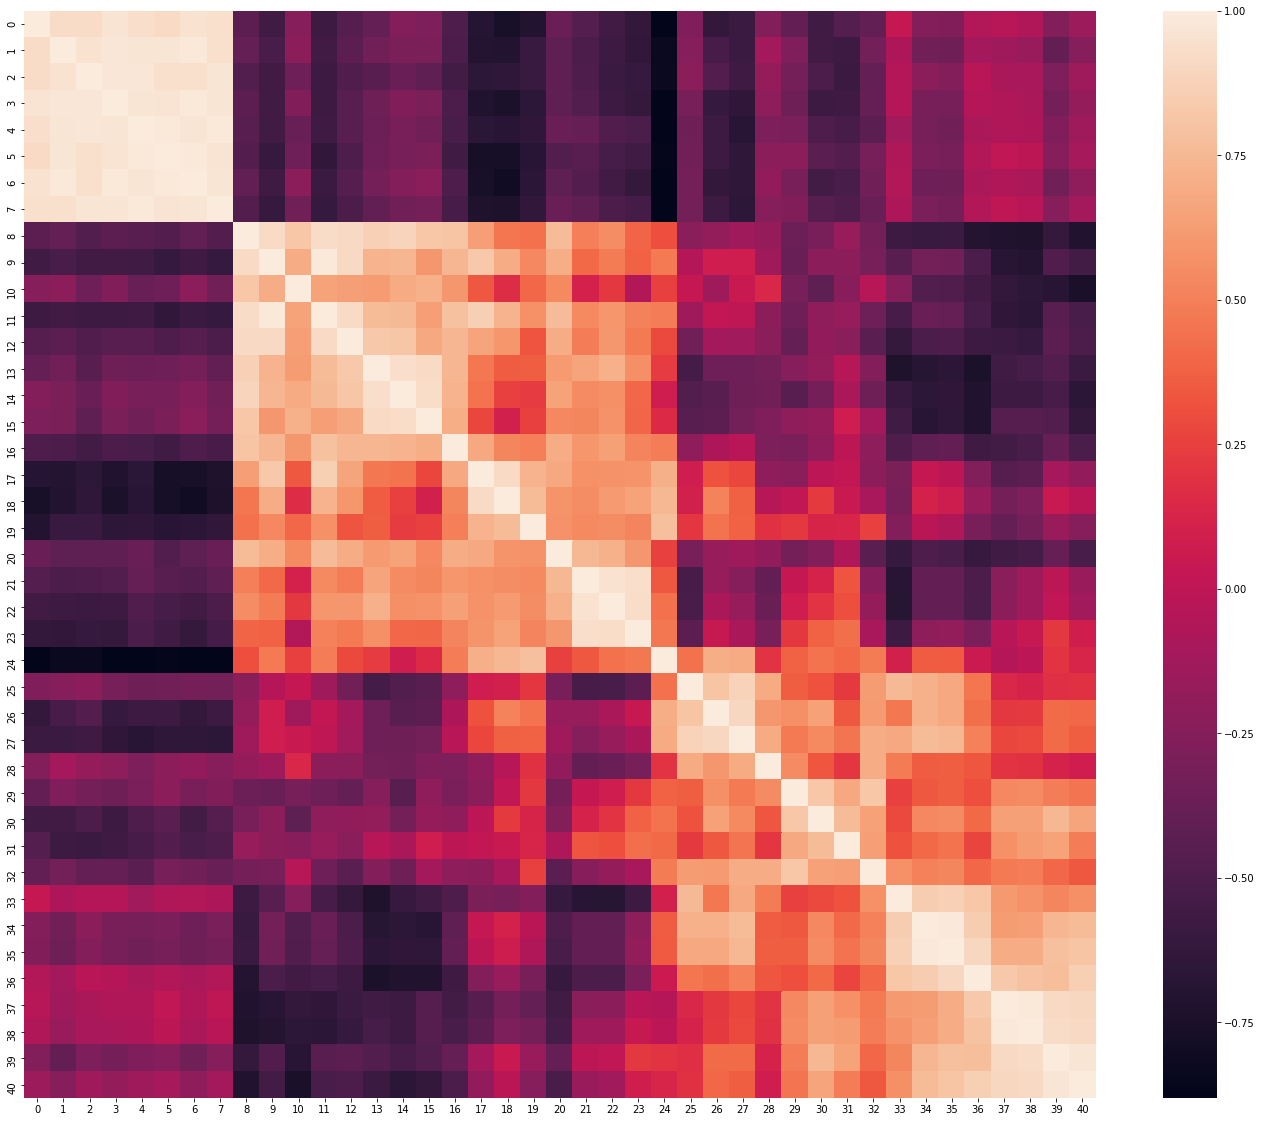

In [92]:
sns.mpl.pyplot.figure(figsize=(24,20))
sns.heatmap(cryo_data_scaled.transpose().corr().values);

In [93]:
Z_single = linkage(cryo_data_scaled, metric='euclidean', method='single')
#use of hierarchical clustering modelling

In [94]:
print(cryo_data_scaled.shape)
Z_single[:25]

(41, 15)


array([[34.        , 35.        ,  0.58043386,  2.        ],
       [37.        , 38.        ,  0.66993763,  2.        ],
       [21.        , 22.        ,  0.8366437 ,  2.        ],
       [ 9.        , 11.        ,  0.92257299,  2.        ],
       [23.        , 43.        ,  0.9248115 ,  3.        ],
       [39.        , 40.        ,  1.02503151,  2.        ],
       [ 3.        ,  6.        ,  1.0327552 ,  2.        ],
       [ 5.        , 47.        ,  1.08136903,  3.        ],
       [ 1.        , 48.        ,  1.0996044 ,  4.        ],
       [ 4.        ,  7.        ,  1.13972912,  2.        ],
       [49.        , 50.        ,  1.17317838,  6.        ],
       [ 2.        , 51.        ,  1.2481644 ,  7.        ],
       [17.        , 18.        ,  1.26252959,  2.        ],
       [29.        , 30.        ,  1.27211397,  2.        ],
       [32.        , 54.        ,  1.28928802,  3.        ],
       [31.        , 55.        ,  1.34246094,  4.        ],
       [25.        , 27.

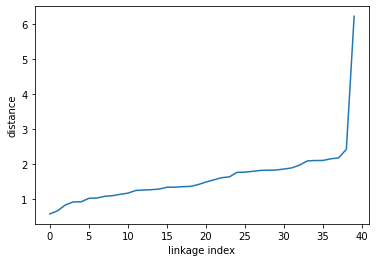

In [95]:
sns.mpl.pyplot.plot(np.arange(Z_single.shape[0]),Z_single[:,2])
sns.mpl.pyplot.xlabel("linkage index")
sns.mpl.pyplot.ylabel("distance");

In [96]:
distances_euclidean = pdist(cryo_data_scaled, metric='euclidean')
distances_euclidean

array([2.32888918, 2.49642023, 1.90789229, 2.10915884, 2.15754095,
       1.76746696, 2.09179531, 7.5837472 , 8.69626724, 7.85034312,
       8.60411555, 8.13233695, 8.09212708, 7.91669546, 7.93458584,
       8.17201531, 7.87572036, 7.98133068, 8.07256108, 7.29225256,
       7.75959152, 7.59599935, 7.93158749, 7.94374922, 6.80992539,
       8.05876223, 7.42736473, 6.46634803, 7.02875677, 7.22035445,
       6.93744072, 7.00871621, 6.44219033, 7.15807575, 7.16980511,
       6.39538841, 6.83269897, 7.05784993, 7.5838144 , 6.95617645,
       1.54153741, 1.20379919, 1.34447366, 1.45775887, 1.0996044 ,
       1.8010873 , 7.80056929, 8.60753775, 8.02266064, 8.59896009,
       8.24135059, 8.29480875, 8.37207229, 8.3811675 , 8.63037561,
       8.11732838, 8.19663058, 8.18838167, 7.7985456 , 8.24057752,
       8.0200102 , 8.3123671 , 8.0449095 , 6.98020794, 7.88815292,
       7.55537664, 6.6412387 , 7.18282598, 7.55005571, 7.43068741,
       7.22232652, 7.0029648 , 7.51873688, 7.50208866, 6.76853

In [97]:
distances_square = squareform(distances_euclidean)
distances_square

array([[0.        , 2.32888918, 2.49642023, ..., 7.05784993, 7.5838144 ,
        6.95617645],
       [2.32888918, 0.        , 1.54153741, ..., 7.66775281, 8.17794223,
        7.46705029],
       [2.49642023, 1.54153741, 0.        , ..., 7.76858601, 8.1769227 ,
        7.48365259],
       ...,
       [7.05784993, 7.66775281, 7.76858601, ..., 0.        , 1.365151  ,
        1.42844241],
       [7.5838144 , 8.17794223, 8.1769227 , ..., 1.365151  , 0.        ,
        1.02503151],
       [6.95617645, 7.46705029, 7.48365259, ..., 1.42844241, 1.02503151,
        0.        ]])

In [98]:
avg_cophenet,coph_dists = cophenet(Z_single,distances_euclidean)
print("Cophenetic correlation, euclidean distance with average linkage:",avg_cophenet)

Cophenetic correlation, euclidean distance with average linkage: 0.866372955010815


In [99]:
# average
z_average = linkage(cryo_data_scaled, metric='euclidean', method='average')
avg_cophenet_average ,coph_dists_average = cophenet(z_average,distances_euclidean)
print(f"Cophenetic correlation, euclidean distance with average linkage:",avg_cophenet_average)

# complete
z_complete = linkage(cryo_data_scaled, metric='euclidean', method='complete')
avg_cophenet_complete,coph_dists_complete = cophenet(z_complete,distances_euclidean)
print(f"Cophenetic correlation, euclidean distance with single linkage:",avg_cophenet_complete)

# ward
z_ward = linkage(cryo_data_scaled, metric='euclidean', method='ward')
avg_cophenet_ward,coph_dists_complete = cophenet(z_ward,distances_euclidean)
print(f"Cophenetic correlation, euclidean distance with single linkage:",avg_cophenet_ward)

Cophenetic correlation, euclidean distance with average linkage: 0.9345301382106975
Cophenetic correlation, euclidean distance with single linkage: 0.8884339137912098
Cophenetic correlation, euclidean distance with single linkage: 0.9209930110894783


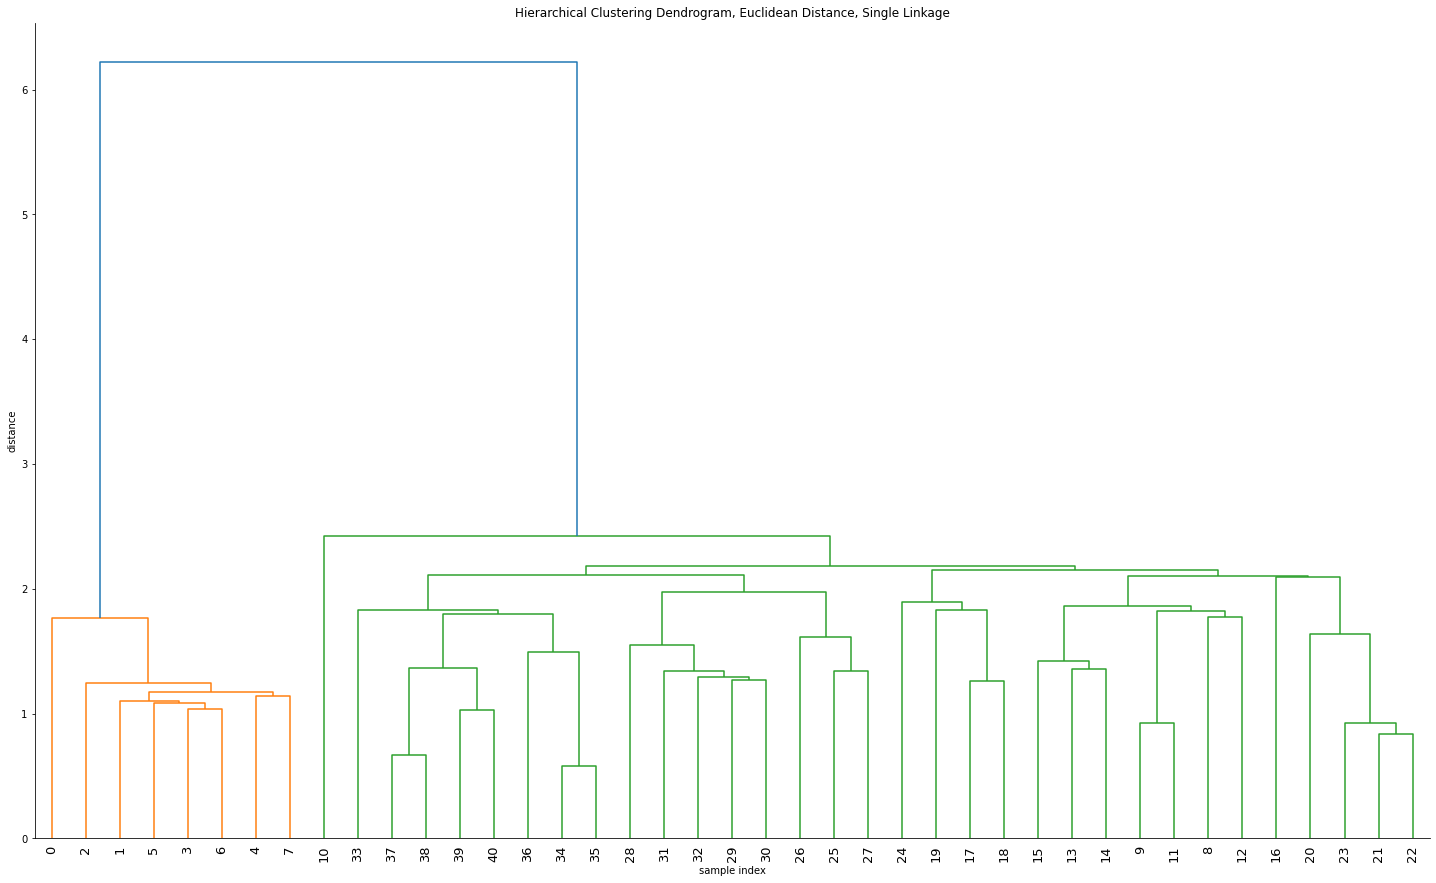

In [100]:
# calculate full dendrogram of antifreeze glycoprotein data in relation to cryopreservation damage/protection
sns.mpl.pyplot.figure(figsize=(25, 15))
sns.mpl.pyplot.title('Hierarchical Clustering Dendrogram, Euclidean Distance, Single Linkage')
sns.mpl.pyplot.xlabel('sample index')
sns.mpl.pyplot.ylabel('distance')
dendrogram(
    Z_single,
    leaf_rotation=90.,  # rotates the x axis labels 90 degrees
    leaf_font_size=13.,  # font size for the x axis labels
)
sns.despine()
sns.mpl.pyplot.show()

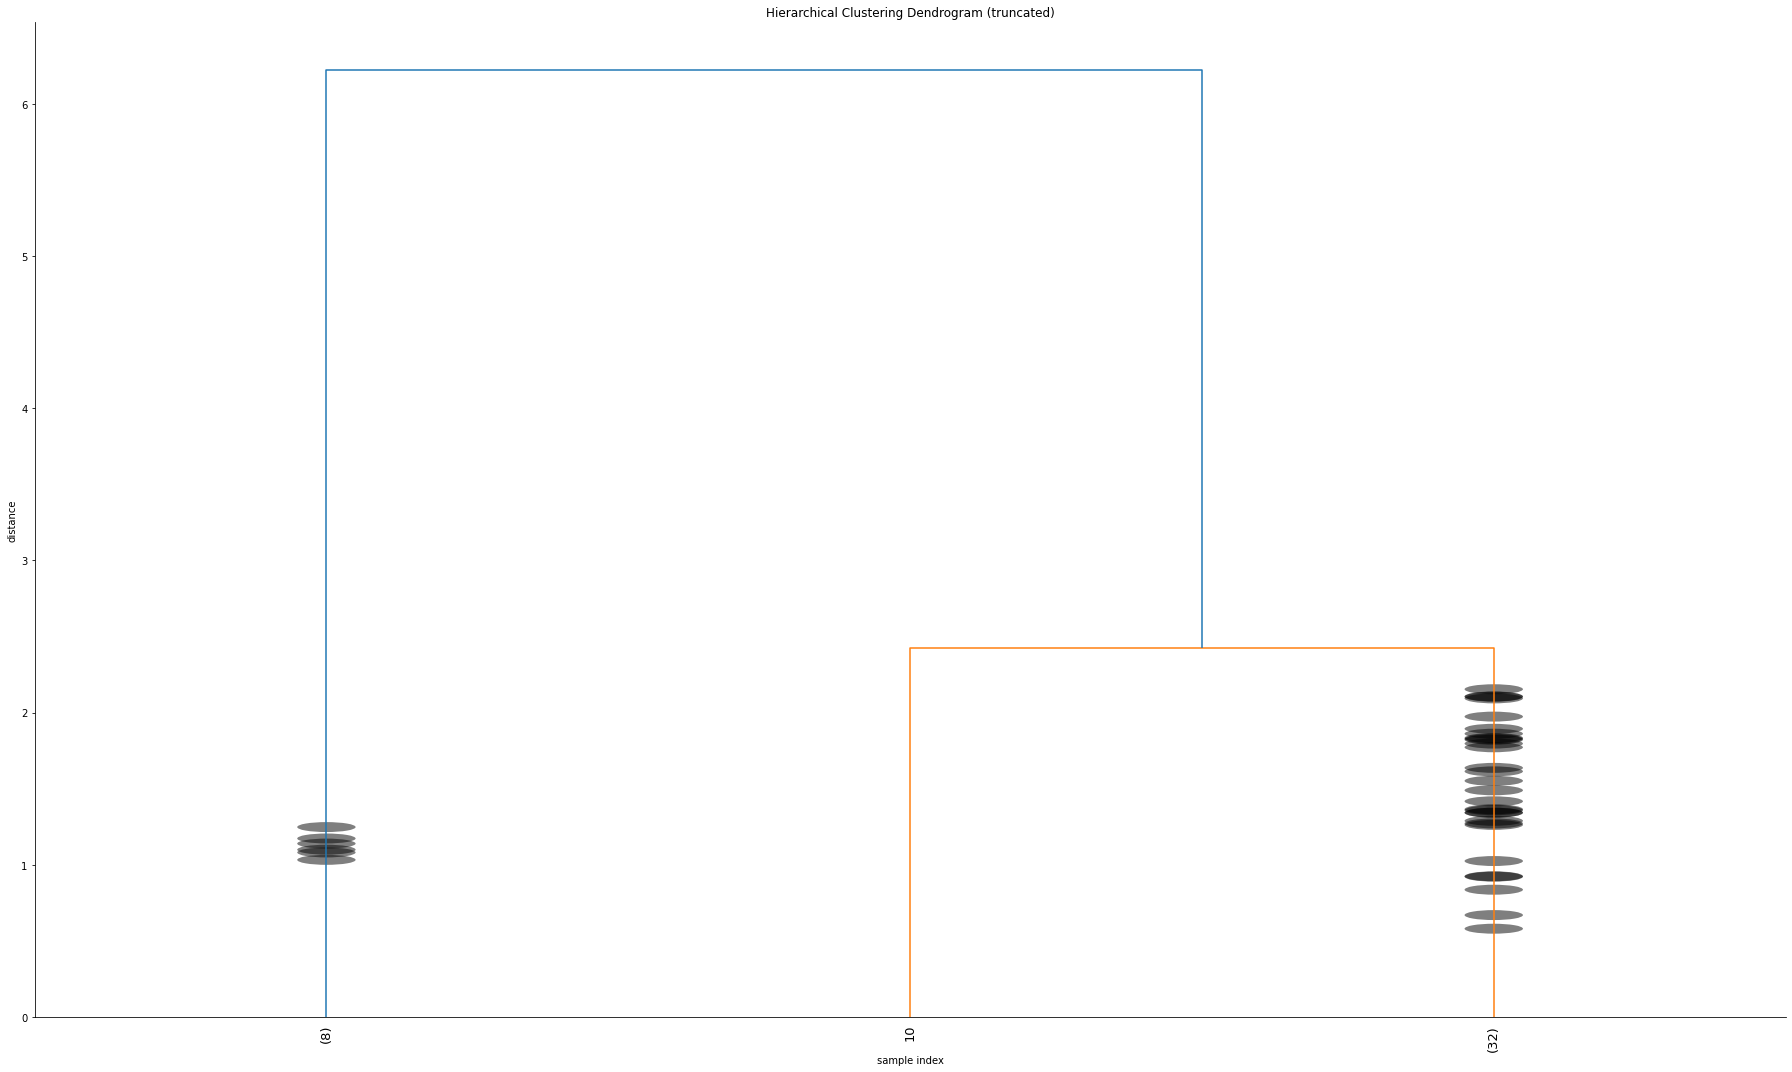

In [101]:
sns.mpl.pyplot.figure(figsize=(25, 15))
sns.mpl.pyplot.title('Hierarchical Clustering Dendrogram (truncated)')
sns.mpl.pyplot.xlabel('sample index')
sns.mpl.pyplot.ylabel('distance')
dendrogram(
    Z_single,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last 3 merged clusters
    leaf_rotation=90.,
    leaf_font_size=13.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
sns.despine()

sns.mpl.pyplot.tight_layout()
sns.mpl.pyplot.show()

In [102]:
import pickle

# Let's save the logistic regression model out
with open('cryolr_model.pickle', 'wb') as file_out:
    pickle.dump(lr, file_out)

NameError: name 'lr' is not defined

In [ ]:
#alco2009 = pd.DataFrame({"Beer" : (1.20, 1.31, 1.19, «more rows»),
#"Wine" : (0.22, 0.54, 0.38, «more rows»),
#"Spirits" : (0.58, 1.16, 0.74, «more rows»)},
#index=("Alabama", "Alaska", «more states»))
# You can also use a dictionary of columns to the same effect:

In [ ]:
#alco2009 = pd.DataFrame([(1.20, 0.22, 0.58),
#(1.31, 0.54, 1.16),
#(1.19, 0.38, 0.74),
#«more rows»],
#columns=("Beer", "Wine", "Spirits"),
#index=("Alabama", "Alaska", «more states»))
# You can also use a dictionary of rows to the same effect: